In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn. tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [6]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome']
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
df = pd.read_csv(url, names=cols)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7662337662337663
Confusion Matrix:
 [[83 16]
 [20 35]]


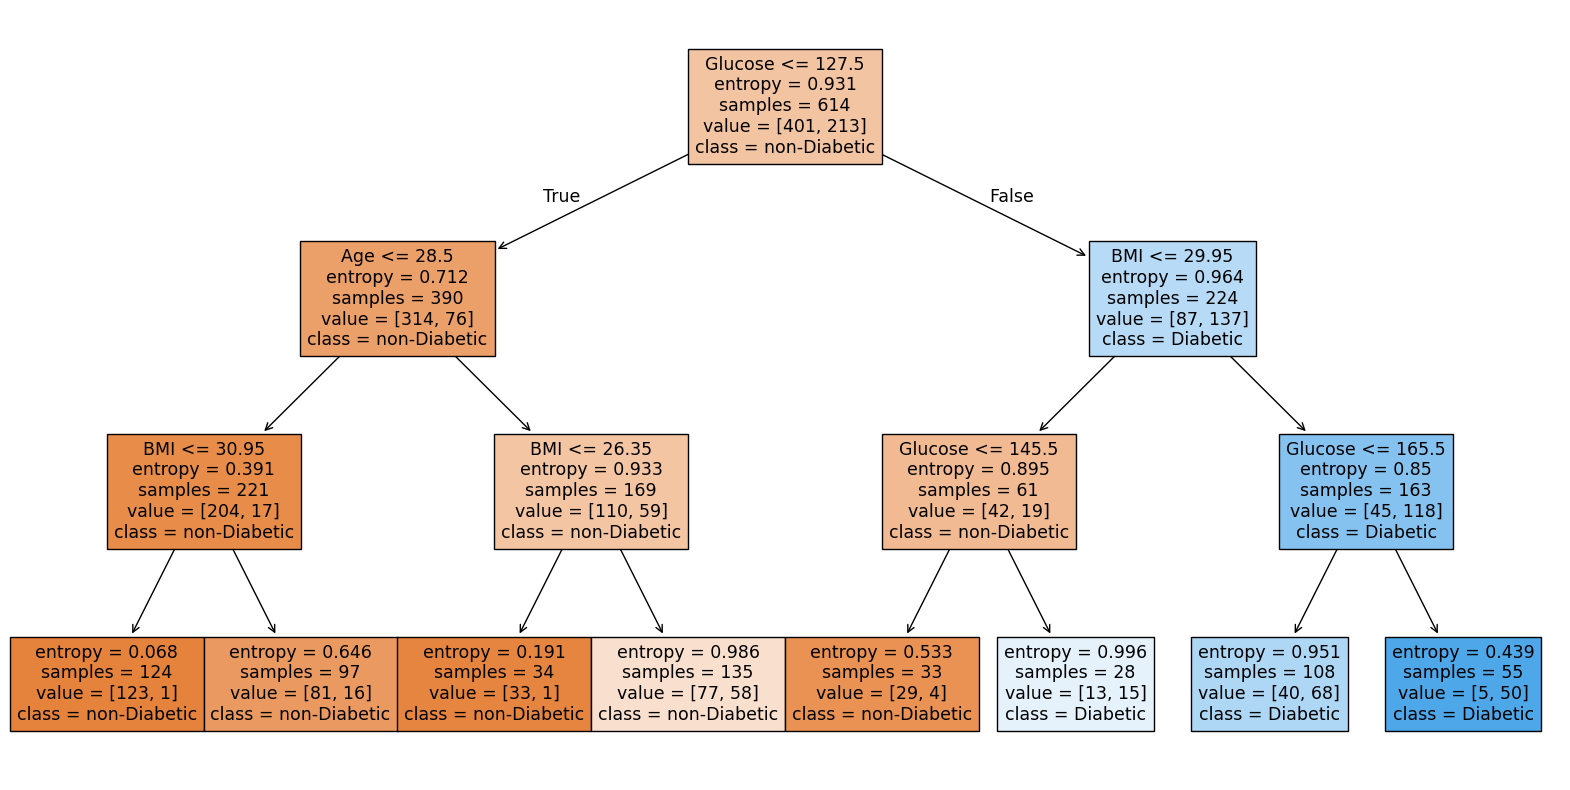

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["non-Diabetic", "Diabetic"], filled=True)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
dt_clf.fit(X_train, y_train)

print("Decision Tree - Training Accuracy:", dt_clf.score(X_train, y_train))
print("Decision Tree - Test Accuracy:", dt_clf.score(X_test, y_test))

Decision Tree - Training Accuracy: 0.7752442996742671
Decision Tree - Test Accuracy: 0.7662337662337663


In [21]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

print("Random Forest - Training Accuracy:", rf_clf.score(X_train, y_train))
print("Random Forest- Test Accuracy:", rf_clf.score(X_test, y_test))

Random Forest - Training Accuracy: 1.0
Random Forest- Test Accuracy: 0.7207792207792207


In [18]:
importance = rf_clf.feature_importances_

feat_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feat_importance)


Glucose                     0.258864
BMI                         0.169984
Age                         0.140931
DiabetesPedigreeFunction    0.123768
BloodPressure               0.088134
Pregnancies                 0.076551
Insulin                     0.076122
SkinThickness               0.065646
dtype: float64


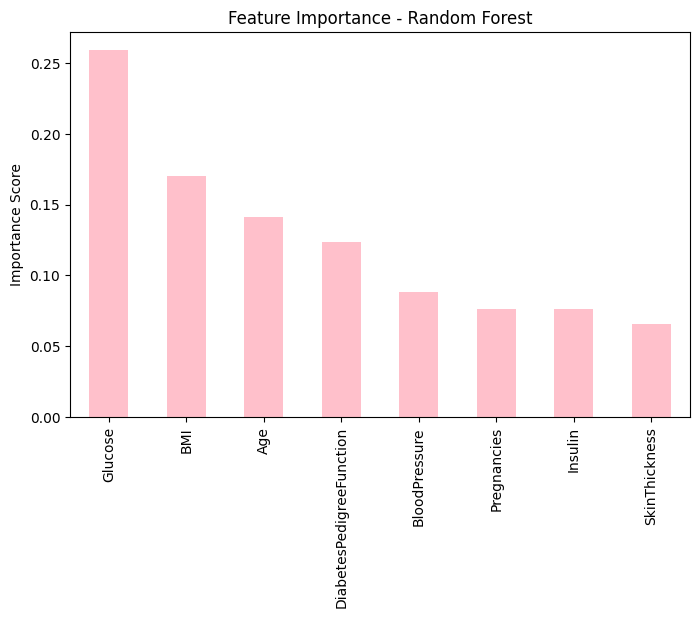

In [19]:
plt.figure(figsize = (8, 5))
feat_importance.plot(kind='bar', color="pink")
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()